<a href="https://colab.research.google.com/github/vedvkandge2000/Google-Colab/blob/master/Data_CApstone_Project_On_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/drive/My Drive/lending_club_loan_two.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
df.info()
# From this we can see that there are many missing and null values in data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

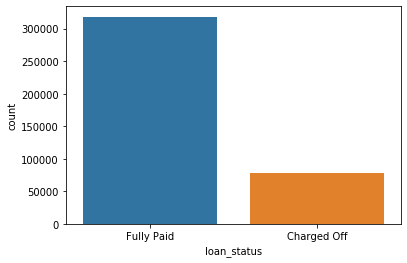

In [ ]:
# Do smoe data analysis.
# Since we are going to predict loan status let's plot a countmap on this
sns.countplot(df['loan_status'])

(array([4.2620e+03, 8.4330e+03, 1.2527e+04, 2.6213e+04, 2.1650e+04,
        1.8945e+04, 2.2140e+04, 1.6424e+04, 3.9178e+04, 1.2073e+04,
        2.8333e+04, 1.4873e+04, 2.6893e+04, 1.4963e+04, 7.4560e+03,
        1.4566e+04, 6.1640e+03, 2.2873e+04, 8.2210e+03, 6.0600e+03,
        1.1086e+04, 1.1654e+04, 2.5050e+03, 2.4980e+03, 6.6640e+03,
        1.7120e+03, 7.8580e+03, 2.2150e+03, 1.2940e+03, 1.0900e+03,
        1.4950e+04, 5.2000e+01, 9.0000e+00, 1.1000e+01, 1.8500e+02]),
 array([  500.        ,  1628.57142857,  2757.14285714,  3885.71428571,
         5014.28571429,  6142.85714286,  7271.42857143,  8400.        ,
         9528.57142857, 10657.14285714, 11785.71428571, 12914.28571429,
        14042.85714286, 15171.42857143, 16300.        , 17428.57142857,
        18557.14285714, 19685.71428571, 20814.28571429, 21942.85714286,
        23071.42857143, 24200.        , 25328.57142857, 26457.14285714,
        27585.71428571, 28714.28571429, 29842.85714286, 30971.42857143,
        32100.    

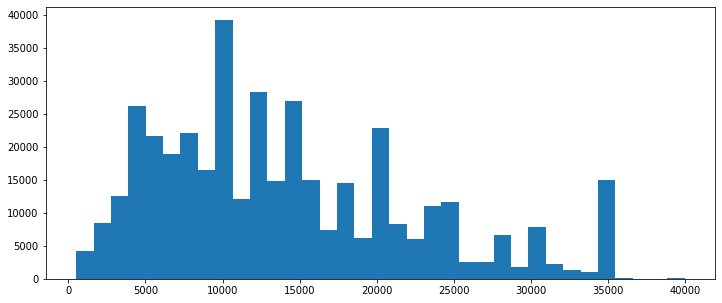

In [ ]:
# Let's explore some another features.
plt.figure(figsize=(12,5))
plt.hist(df['loan_amnt'],bins=35)

In [ ]:
# Let's find the coorelation between features.
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


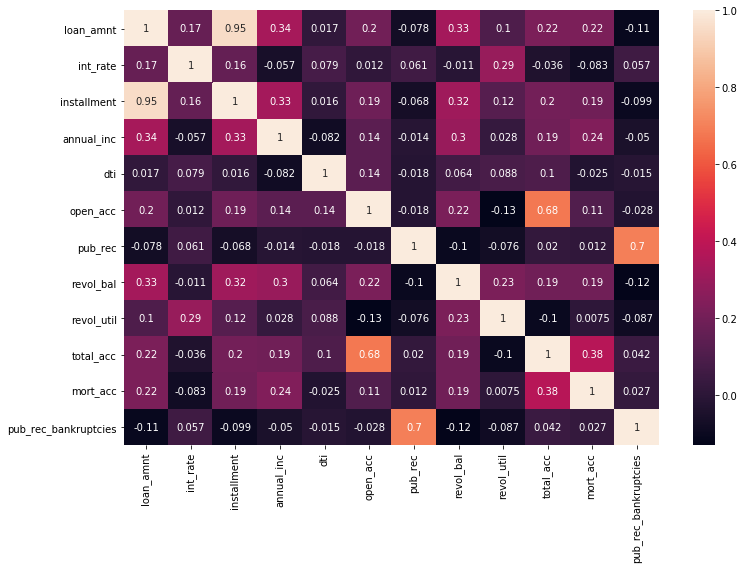

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
# From this we can see that the relation between which two feature is stronger.

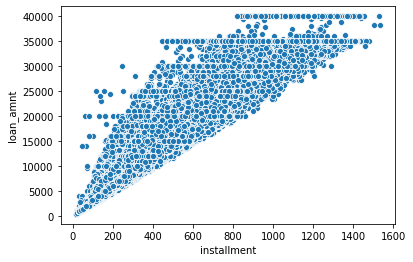

In [ ]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)
# From this we can say that as loan amount increases installments also increases but for some points loan amount is same but number of
# installments are different this means that there may be chances of duplicate data.

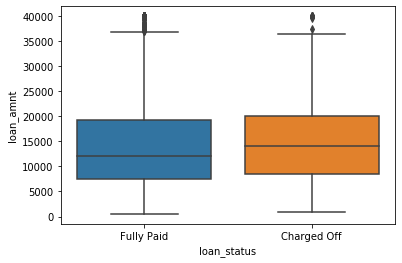

In [ ]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
# From this we can say that if loan amnt is near to the 1lakh then mostly it will be fully paid and if it is near to the 1.5L then it mostly
# changred off

In [ ]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [ ]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [ ]:
sub_grade_order = sorted(df['sub_grade'].unique())
sub_grade_order

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

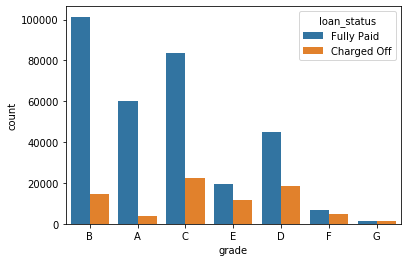

In [ ]:
sns.countplot(x='grade',data=df,hue='loan_status')

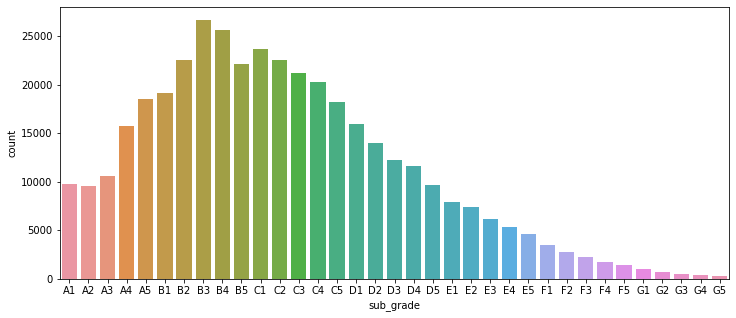

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='sub_grade',order=sub_grade_order,data=df)

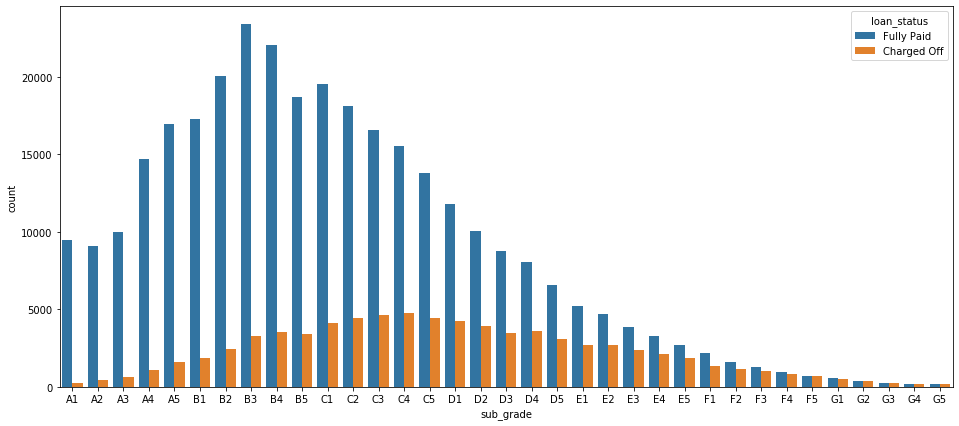

In [ ]:
plt.figure(figsize=(16,7))
sns.countplot(x='sub_grade',data=df, order=sub_grade_order,hue='loan_status')

# This shows that F and G grade are not get paid that much
# So isolate them  and plot sepretely.

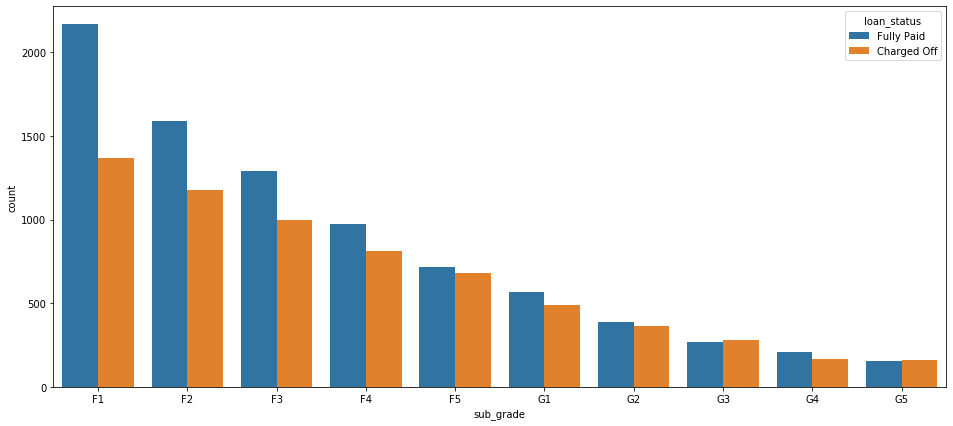

In [ ]:
plt.figure(figsize=(16,7))
sns.countplot(x='sub_grade',data=df, order=sub_grade_order[25:],hue='loan_status')

In [ ]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [ ]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [ ]:
df[['loan_repaid','loan_status']]
# So now we have converted a text data into numrical form so now we can corelate this data with the other features.
# loan_repaid is the lable which we are going to predict.

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


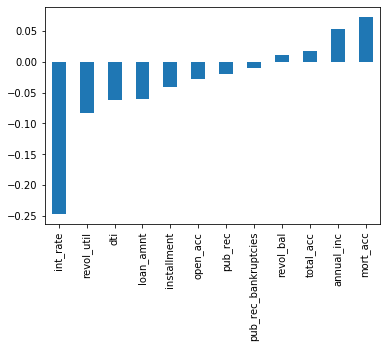

In [ ]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot('bar')

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
df.isnull().sum()/len(df)*100
# So there is much more missing data in this so either we can remove them or we can creat dummy variables.
# Let's see emp_title and emp_length first.

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [ ]:
df['emp_title'].nunique()

173105

In [ ]:
df['emp_title'].value_counts()

Teacher                 4389
Manager                 4250
Registered Nurse        1856
RN                      1846
Supervisor              1830
                        ... 
BNY MELLON CO.             1
State of california        1
ShopIgniter, Inc           1
Boston Capital             1
DB                         1
Name: emp_title, Length: 173105, dtype: int64

In [ ]:
# So here we can not apply lable encoading because there is not a specific values or strings.
# So we can delete the column.

In [ ]:
df = df.drop('emp_title',axis=1)

In [ ]:
#sorted(df['emp_length'].dropna().unique())

In [ ]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

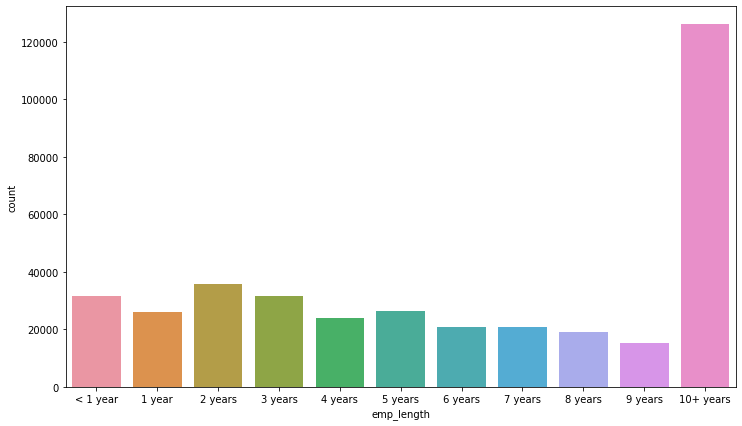

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(x='emp_length',data=df,order=emp_length_order)

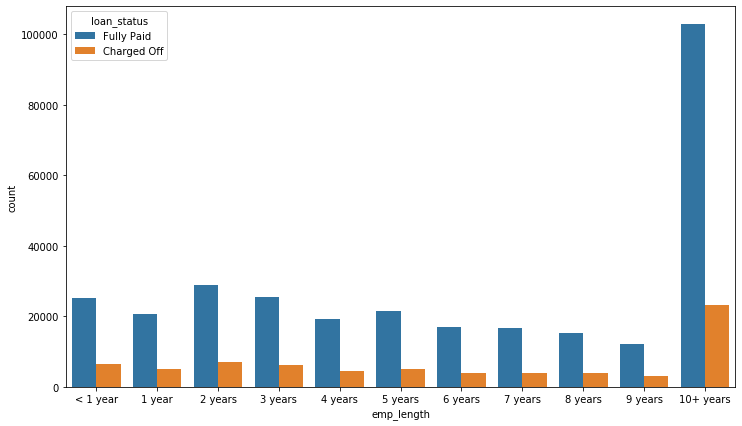

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

In [ ]:
# This info does not strongly inform us that the there is a strong relation between emp_length and being charged off.
# So now we will find the percentage of people being chnaged of and then plot a bar garph for each emp_length category.
emp_co = df[df['loan_status']=="Charged Off"].groupby('emp_length').count()['loan_status']
emp_fp = df[df['loan_status']=="Fully Paid"].groupby('emp_length').count()['loan_status']

In [ ]:
emp_len = emp_co/emp_fp
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

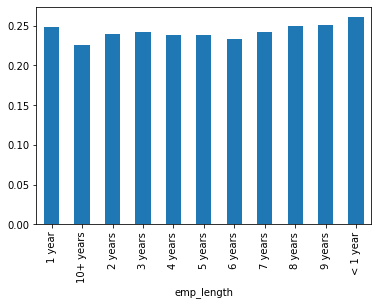

In [ ]:
emp_len.plot(kind='bar')
# So From this bar plot we can say that the percentage of people chagred off are almost same for all categories of emp_len.
# So we may say that emp_len is not strongly related to the loan_status so we can drop this column. 

In [ ]:
df = df.drop('emp_length',axis=1)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
# Now let's see the title and purpoae column.
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [ ]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [ ]:
# So here we see that the data in these two column is almost same so we can drop column with large missing values

In [ ]:
df= df.drop('title',axis=1)

In [ ]:
# Now we will see morr_acc column which gives the information about number mortgage accounts.
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [ ]:
# Now we can deal with missing data either by linear approach or by find relation with other columns and many more.
# Let's find out the corelation os mort_acc with other features.
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [ ]:
# So this shows that there is a strong relation between total_acc and mort_acc so now we can fill the nan values in mort_acc by taking mean 
# For each category of total_acc and replace the same.
mort_total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [ ]:
def fill_mort_acc(mort,total):
  if(np.isnan(mort)):
    return mort_total_acc_avg[total]
  else:
    return mort

In [ ]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['mort_acc'],x['total_acc']),axis=1)

In [ ]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [ ]:
len(df)
(276/len(df))*100 + ((535/len(df))*100)

0.20478246597479988

In [ ]:
# So here we see that the in revol_util and pub_rec_bankrupties nearly 0.2% percent of  data is missing so we remove that rows by dropna()
# which will not bother that much.
df = df.dropna() 

In [ ]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [ ]:
# Now we are going to work on categorical data.
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
loan_repaid               int64
dtype: object

In [ ]:
# loc gets rows (or columns) with particular labels from the index. iloc gets rows (or columns) at particular positions in the index 
# (so it only takes integers).

In [ ]:
df['term'] = df['term'].apply(lambda term: int(term[:2]))

In [ ]:
# Since we know that grade is part of subgrade so drop the grade column.
df = df.drop('grade',axis=1)

In [ ]:
df.select_dtypes(include='object').columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [ ]:
# Now we can do this with getdummies or one hot encoding or lable encoading to the subgrade column.


In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# sub_grade = np.array(df['sub_grade']).reshape(-1,1)
# OH_subgrade = pd.DataFrame(OH_encoder.fit_transform(sub_grade))

In [ ]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [ ]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [ ]:
df.select_dtypes(include='object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [ ]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)

In [ ]:
df = pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [ ]:
df.select_dtypes(include='object').columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [ ]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [ ]:
home_owner_dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

In [ ]:
df = pd.concat([df.drop('home_ownership',axis=1),home_owner_dummies],axis=1)

In [ ]:
df.select_dtypes(include='object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [ ]:
df['zip_coad'] = df['address'].apply(lambda address: address[-5:])

In [ ]:
zip_coad_dummies = pd.get_dummies(df['zip_coad'],drop_first=True)
zip_coad_dummies

,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,1,0,0,0,0
396026,1,0,0,0,0,0,0,0,0
396027,0,0,0,0,0,0,1,0,0
396028,0,0,0,1,0,0,0,0,0


In [ ]:
df = pd.concat([df.drop(['address','zip_coad'],axis=1),zip_coad_dummies],axis=1)

In [ ]:
df.select_dtypes(include='object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

In [ ]:
df = df.drop('issue_d',axis=1)

In [ ]:
df['earliest_cr_line'] =df['earliest_cr_line'].apply(lambda line: int(line[-4:]))

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,3,11.44,329.48,117000.0,Fully Paid,26.24,1990,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
1,8000.0,3,11.99,265.68,65000.0,Fully Paid,22.05,2004,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600.0,3,10.49,506.97,43057.0,Fully Paid,12.79,2007,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
3,7200.0,3,6.49,220.65,54000.0,Fully Paid,2.60,2006,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,24375.0,6,17.27,609.33,55000.0,Charged Off,33.95,1999,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Now here we split our data into train and test data.
from sklearn.model_selection import train_test_split

In [ ]:
df = df.drop('loan_status',axis=1)

In [ ]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalar = MinMaxScaler()

In [ ]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
# Let's creat a model with this data
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
model.fit(x=X_train,y=y_train,batch_size=256,epochs=25,validation_data=(X_test,y_test))

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 5s 15us/sample - loss: 0.3109 - val_loss: 0.2670
Epoch 2/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2672 - val_loss: 0.2632
Epoch 3/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2637 - val_loss: 0.2623
Epoch 4/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2623 - val_loss: 0.2624
Epoch 5/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2613 - val_loss: 0.2617
Epoch 6/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2610 - val_loss: 0.2618
Epoch 7/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2604 - val_loss: 0.2625
Epoch 8/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2598 - val_loss: 0.2614
Epoch 9/25
316175/316175 [==============================] - 4s 14us/sample - 

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('classification_data_model.h5')  

In [ ]:
# Let's plot the graph of loss vs validation loss
losses = pd.DataFrame(model.history.history)

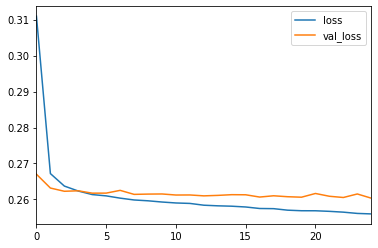

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions.round()))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [ ]:
print(confusion_matrix(y_test,predictions.round()))

[[ 7051  8607]
 [  254 63132]]


In [ ]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term               6.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [ ]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]], dtype=int32)

In [ ]:
df.iloc[random_ind]['loan_repaid']

1.0